Accuracy: 0.00
Confusion Matrix:
[[0 3]
 [1 0]]


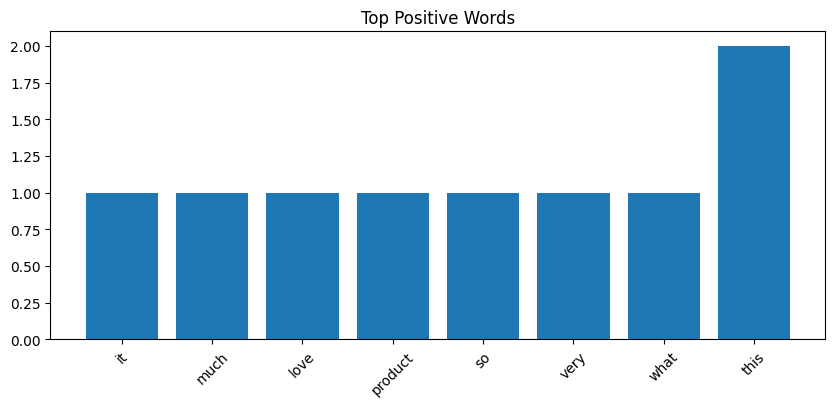

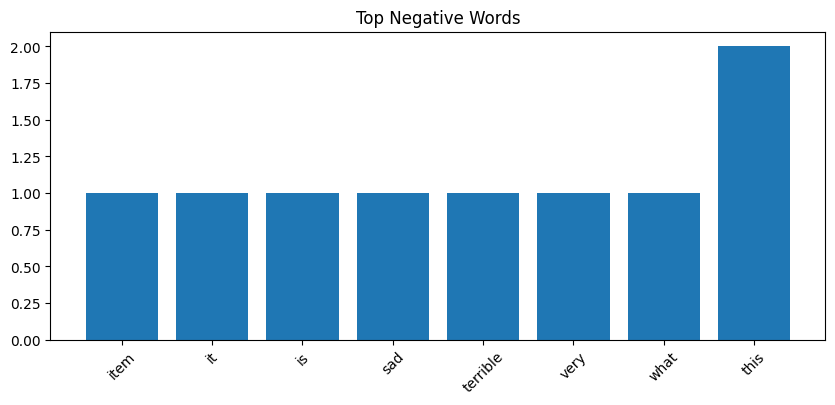

In [1]:
# -------------------------------
# MULTINOMIAL NAIVE BAYES (NLP)
# Synthetic Sentiment Dataset
# -------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. SYNTHETIC SENTIMENT DATA
data = {
    "text": [
        "I love this product", "This is amazing", "I am very happy",
        "What a great experience", "Absolutely fantastic", "I like it so much",
        "I hate this item", "This is terrible", "I am very sad",
        "What a bad experience", "Absolutely horrible", "I dislike it a lot"
    ],
    "label": [
        "positive", "positive", "positive", "positive", "positive", "positive",
        "negative", "negative", "negative", "negative", "negative", "negative"
    ]
}

df = pd.DataFrame(data)

# 2. TEXT VECTORIZATION
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["label"]

# 3. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. TRAIN MULTINOMIAL NB
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. PREDICT
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# -------------------------------
# 6. VISUALIZE WORD FREQUENCIES
# -------------------------------

# Word frequencies per class
positive_docs = df[df["label"] == "positive"]["text"]
negative_docs = df[df["label"] == "negative"]["text"]

pos_counts = vectorizer.transform(positive_docs).sum(axis=0).A1
neg_counts = vectorizer.transform(negative_docs).sum(axis=0).A1

words = vectorizer.get_feature_names_out()

# Top N words
N = 8

# Positive
top_pos_idx = pos_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_pos_idx], pos_counts[top_pos_idx])
plt.title("Top Positive Words")
plt.xticks(rotation=45)
plt.show()

# Negative
top_neg_idx = neg_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_neg_idx], neg_counts[top_neg_idx])
plt.title("Top Negative Words")
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.25


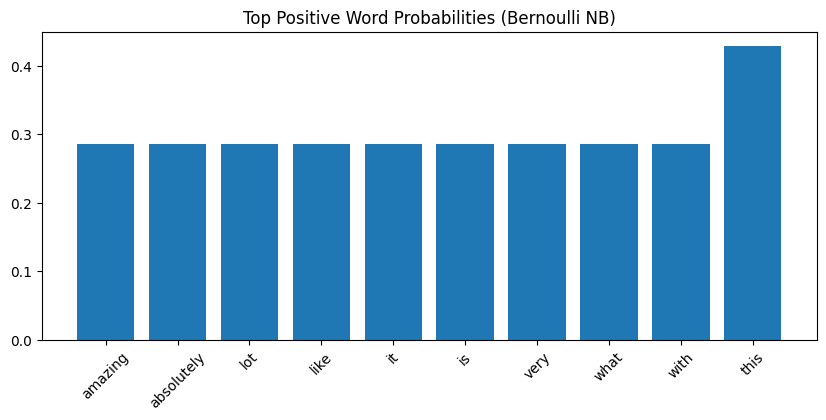

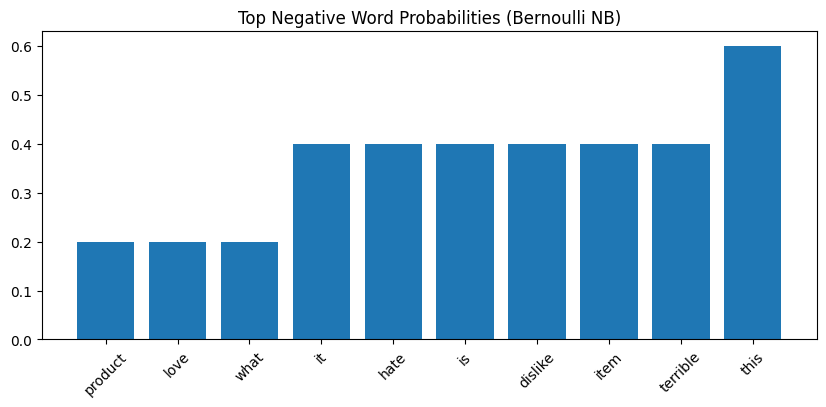

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------
# 1. Create Synthetic Sentiment Dataset
# ---------------------------------------------
data = {
    "text": [
        "I love this product", "This is amazing", "Very happy with this",
        "What a great experience", "Absolutely fantastic", "I like it a lot",
        "I hate this item", "This is terrible", "I am very sad",
        "What a bad experience", "Absolutely horrible", "I dislike it"
    ],
    "label": [
        "positive","positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(data)

# ---------------------------------------------
# 2. Convert text to Binary Features (0/1)
# ---------------------------------------------
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

# ---------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------------------------------------
# 4. Train Bernoulli Naive Bayes Model
# ---------------------------------------------
model = BernoulliNB()
model.fit(X_train, y_train)

# ---------------------------------------------
# 5. Evaluate
# ---------------------------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# ---------------------------------------------
# 6. Extract Word Probabilities
# ---------------------------------------------
feature_names = vectorizer.get_feature_names_out()
log_prob = model.feature_log_prob_

# log_prob[0] -> negative class
# log_prob[1] -> positive class

prob_negative = np.exp(log_prob[0])
prob_positive = np.exp(log_prob[1])

# ---------------------------------------------
# 7. Plot Top Positive Words
# ---------------------------------------------
top_pos_idx = prob_positive.argsort()[-10:]

plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_pos_idx], prob_positive[top_pos_idx])
plt.xticks(rotation=45)
plt.title("Top Positive Word Probabilities (Bernoulli NB)")
plt.show()

# ---------------------------------------------
# 8. Plot Top Negative Words
# ---------------------------------------------
top_neg_idx = prob_negative.argsort()[-10:]

plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_neg_idx], prob_negative[top_neg_idx])
plt.xticks(rotation=45)
plt.title("Top Negative Word Probabilities (Bernoulli NB)")
plt.show()
